In [ ]:
!pip install gensim --quiet

In [ ]:
pip install --upgrade numpy gensim

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
!pip install --upgrade numpy==1.26.4 gensim pandas

In [ ]:
!pip install --upgrade gensim==4.2.0 numpy==1.26.4

  Using cached gensim-4.2.0.tar.gz (23.2 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gensim
  Running setup.py clean for gensim
Failed to build gensim
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (gensim)


In [ ]:
!pip uninstall numpy -y
!pip install numpy==1.23.5

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 53.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is inco

In [ ]:
pip install --upgrade pandas tensorflow gensim

  Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 36.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Bidirectional, Lambda, Layer # Import Layer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from gensim.models import Word2Vec


# Load Dataset
def load_data():
    train_df = pd.read_csv("trainingdata.csv")  # Training Data
    test_df = pd.read_csv("testingdata.csv")    # Test Data
    test_long_df = pd.read_csv("testinglongdata_500.csv")  # Longer queries
    test_long_v2_df = pd.read_csv("testinglongdatav2.csv")  # Another long queries set

    # Combine test sets
    test_df = pd.concat([test_df, test_long_df, test_long_v2_df], ignore_index=True)

    return train_df, test_df

# Preprocess SQL Queries
def preprocess_text(df):
    df['Query'] = df['Query'].str.lower().str.replace('[^\w\s]', '', regex=True)
    return df

# Load and preprocess data
train_df, test_df = load_data()
train_df = preprocess_text(train_df)
test_df = preprocess_text(test_df)

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['Query'])
vocab_size = len(tokenizer.word_index) + 1

# Convert Queries to Sequences
def text_to_sequences(df, max_len=50):
    sequences = tokenizer.texts_to_sequences(df['Query'])
    return pad_sequences(sequences, maxlen=max_len)

max_len = 50  # Define max query length
X_train = text_to_sequences(train_df, max_len)
X_test = text_to_sequences(test_df, max_len)

y_train = train_df['Label'].values
y_test = test_df['Label'].values

# Train Word2Vec Model
sentences = [query.split() for query in train_df['Query']]
word2vec = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
word_vectors = word2vec.wv

# Create Embedding Matrix
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]

# Siamese Network - Triplet Loss
def triplet_loss(y_true, y_pred, alpha=0.4):
    anchor, positive, negative = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2]
    pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis=-1)
    neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis=-1)
    return tf.reduce_mean(tf.maximum(pos_dist - neg_dist + alpha, 0.0))

# Define Embedding Model
def create_embedding_model():
    input_layer = Input(shape=(max_len,))
    embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_layer)
    lstm_layer = Bidirectional(LSTM(64))(embedding_layer)
    dense_layer = Dense(128, activation="relu")(lstm_layer)
    return Model(input_layer, dense_layer)

embedding_model = create_embedding_model()

# Define a custom layer to stack the embeddings
class StackEmbeddings(Layer):
    def call(self, inputs):
        return tf.stack(inputs, axis=1)

# Siamese Network Model
anchor_input = Input(shape=(max_len,))
positive_input = Input(shape=(max_len,))
negative_input = Input(shape=(max_len,))

anchor_embedding = embedding_model(anchor_input)
positive_embedding = embedding_model(positive_input)
negative_embedding = embedding_model(negative_input)

# Use the custom layer to stack embeddings
merged_output = StackEmbeddings()([anchor_embedding, positive_embedding, negative_embedding])

siamese_model = Model(inputs=[anchor_input, positive_input, negative_input], outputs=merged_output)
# Compile Model
siamese_model.compile(loss=triplet_loss, optimizer=Adam(learning_rate=0.001))

# Generate Triplet Pairs
def generate_triplets(X, y):
    normal_queries = X[y == 0]
    malicious_queries = X[y == 1]

    triplets = []
    for i in range(len(normal_queries)):
        anchor = normal_queries[i]
        positive = normal_queries[np.random.randint(0, len(normal_queries))]
        negative = malicious_queries[np.random.randint(0, len(malicious_queries))]
        triplets.append((anchor, positive, negative))

    for i in range(len(malicious_queries)):
        anchor = malicious_queries[i]
        positive = malicious_queries[np.random.randint(0, len(malicious_queries))]
        negative = normal_queries[np.random.randint(0, len(normal_queries))]
        triplets.append((anchor, positive, negative))

    triplets = np.array(triplets)
    return triplets[:, 0], triplets[:, 1], triplets[:, 2]

anchor_train, positive_train, negative_train = generate_triplets(X_train, y_train)

# Train Siamese Model
siamese_model.fit(
    [anchor_train, positive_train, negative_train],
    np.zeros(len(anchor_train)),
    epochs=10,
    batch_size=32
)

# Generate Embeddings for Classification
train_embeddings = embedding_model.predict(X_train)
test_embeddings = embedding_model.predict(X_test)

# Train MLP Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(train_embeddings, y_train)

# Evaluate Model
y_pred = classifier.predict(test_embeddings)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Classification Accuracy: {accuracy:.4f}")

Epoch 1/10
3072/3072 ━━━━━━━━━━━━━━━━━━━━ 54s 16ms/step - loss: 0.0943
Epoch 2/10
3072/3072 ━━━━━━━━━━━━━━━━━━━━ 81s 16ms/step - loss: 0.0583
Epoch 3/10
3072/3072 ━━━━━━━━━━━━━━━━━━━━ 79s 15ms/step - loss: 0.0535
Epoch 4/10
3072/3072 ━━━━━━━━━━━━━━━━━━━━ 82s 16ms/step - loss: 0.0496
Epoch 5/10
3072/3072 ━━━━━━━━━━━━━━━━━━━━ 82s 15ms/step - loss: 0.0481
Epoch 6/10
3072/3072 ━━━━━━━━━━━━━━━━━━━━ 47s 15ms/step - loss: 0.0452
Epoch 7/10
3072/3072 ━━━━━━━━━━━━━━━━━━━━ 82s 15ms/step - loss: 0.0407
Epoch 8/10
3072/3072 ━━━━━━━━━━━━━━━━━━━━ 82s 15ms/step - loss: 0.0390
Epoch 9/10
3072/3072 ━━━━━━━━━━━━━━━━━━━━ 82s 15ms/step - loss: 0.0350
Epoch 10/10
3072/3072 ━━━━━━━━━━━━━━━━━━━━ 82s 15ms/step - loss: 0.0321
3072/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
798/798 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Final Classification Accuracy: 0.9074


Epoch 1/10
3072/3072 ━━━━━━━━━━━━━━━━━━━━ 435s 139ms/step - loss: 0.0969
Epoch 2/10
3072/3072 ━━━━━━━━━━━━━━━━━━━━ 425s 138ms/step - loss: 0.0561
Epoch 3/10
3072/3072 ━━━━━━━━━━━━━━━━━━━━ 441s 138ms/step - loss: 0.0524
Epoch 4/10
3072/3072 ━━━━━━━━━━━━━━━━━━━━ 444s 139ms/step - loss: 0.0499
Epoch 5/10
3072/3072 ━━━━━━━━━━━━━━━━━━━━ 424s 138ms/step - loss: 0.0457
Epoch 6/10
3072/3072 ━━━━━━━━━━━━━━━━━━━━ 441s 138ms/step - loss: 0.0436
Epoch 7/10
3072/3072 ━━━━━━━━━━━━━━━━━━━━ 444s 138ms/step - loss: 0.0408
Epoch 8/10
3072/3072 ━━━━━━━━━━━━━━━━━━━━ 439s 138ms/step - loss: 0.0366
Epoch 9/10
3072/3072 ━━━━━━━━━━━━━━━━━━━━ 423s 138ms/step - loss: 0.0334
Epoch 10/10
3072/3072 ━━━━━━━━━━━━━━━━━━━━ 443s 138ms/step - loss: 0.0301


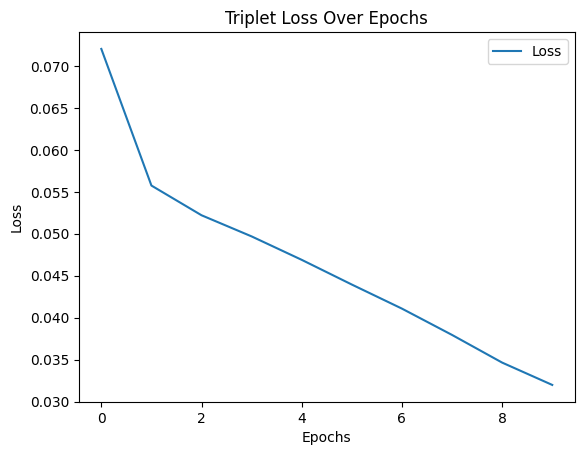

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 50s 16ms/step
798/798 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     13254
           1       0.95      0.95      0.95     12273

    accuracy                           0.95     25527
   macro avg       0.95      0.95      0.95     25527
weighted avg       0.95      0.95      0.95     25527



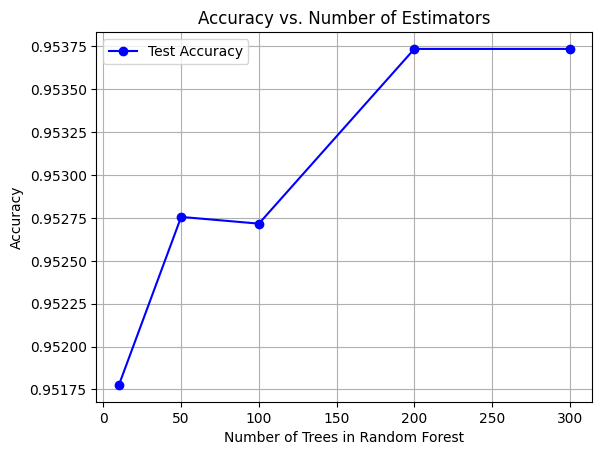

Final Classification Accuracy: 0.9537


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Bidirectional, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import shuffle
from gensim.models import Word2Vec



# Load Dataset
def load_data():
    train_df = pd.read_csv("trainingdata.csv")  # Training Data
    test_df = pd.read_csv("testingdata.csv")    # Test Data
    test_long_df = pd.read_csv("testinglongdata_500.csv")  # Longer queries
    test_long_v2_df = pd.read_csv("testinglongdatav2.csv")  # Another long queries set

    # Combine test sets
    test_df = pd.concat([test_df, test_long_df, test_long_v2_df], ignore_index=True)

    return train_df, test_df

# Preprocess SQL Queries
def preprocess_text(df):
    df['Query'] = df['Query'].str.lower().str.replace('[^\w\s]', '', regex=True)
    return df

# Load and preprocess data
train_df, test_df = load_data()
train_df = preprocess_text(train_df)
test_df = preprocess_text(test_df)

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['Query'])
vocab_size = len(tokenizer.word_index) + 1

# Convert Queries to Sequences
def text_to_sequences(df, max_len=50):
    sequences = tokenizer.texts_to_sequences(df['Query'])
    return pad_sequences(sequences, maxlen=max_len)

max_len = 50  # Define max query length
X_train = text_to_sequences(train_df, max_len)
X_test = text_to_sequences(test_df, max_len)

y_train = train_df['Label'].values
y_test = test_df['Label'].values

# Train Word2Vec Model
sentences = [query.split() for query in train_df['Query']]
word2vec = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
word_vectors = word2vec.wv

# Create Embedding Matrix
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]

# Siamese Network - Triplet Loss
def triplet_loss(y_true, y_pred, alpha=0.4):
    anchor, positive, negative = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2]
    pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis=-1)
    neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis=-1)
    return tf.reduce_mean(tf.maximum(pos_dist - neg_dist + alpha, 0.0))

# Define Embedding Model
def create_embedding_model():
    input_layer = Input(shape=(max_len,))
    embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_layer)
    lstm_layer = Bidirectional(LSTM(64))(embedding_layer)
    dense_layer = Dense(128, activation="relu")(lstm_layer)
    return Model(input_layer, dense_layer)

embedding_model = create_embedding_model()

# Define a custom layer to stack the embeddings
class StackEmbeddings(Layer):
    def call(self, inputs):
        return tf.stack(inputs, axis=1)

# Siamese Network Model
anchor_input = Input(shape=(max_len,))
positive_input = Input(shape=(max_len,))
negative_input = Input(shape=(max_len,))

anchor_embedding = embedding_model(anchor_input)
positive_embedding = embedding_model(positive_input)
negative_embedding = embedding_model(negative_input)

# Use the custom layer to stack embeddings
merged_output = StackEmbeddings()([anchor_embedding, positive_embedding, negative_embedding])

siamese_model = Model(inputs=[anchor_input, positive_input, negative_input], outputs=merged_output)

# Compile Model
siamese_model.compile(loss=triplet_loss, optimizer=Adam(learning_rate=0.001))

# Generate Triplet Pairs
def generate_triplets(X, y):
    normal_queries = X[y == 0]
    malicious_queries = X[y == 1]

    triplets = []
    for i in range(len(normal_queries)):
        anchor = normal_queries[i]
        positive = normal_queries[np.random.randint(0, len(normal_queries))]
        negative = malicious_queries[np.random.randint(0, len(malicious_queries))]
        triplets.append((anchor, positive, negative))

    for i in range(len(malicious_queries)):
        anchor = malicious_queries[i]
        positive = malicious_queries[np.random.randint(0, len(malicious_queries))]
        negative = normal_queries[np.random.randint(0, len(normal_queries))]
        triplets.append((anchor, positive, negative))

    triplets = np.array(triplets)
    return triplets[:, 0], triplets[:, 1], triplets[:, 2]

anchor_train, positive_train, negative_train = generate_triplets(X_train, y_train)

# Train Siamese Model
history = siamese_model.fit(
    [anchor_train, positive_train, negative_train],
    np.zeros(len(anchor_train)),
    epochs=10,
    batch_size=32
)

# Plot Loss Curve
plt.plot(history.history['loss'], label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Triplet Loss Over Epochs")
plt.legend()
plt.show()

# Generate Embeddings for Classification
train_embeddings = embedding_model.predict(X_train)
test_embeddings = embedding_model.predict(X_test)

# Train MLP Classifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(train_embeddings, y_train)

# Evaluate Model
y_pred = classifier.predict(test_embeddings)
accuracy = accuracy_score(y_test, y_pred)

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Evaluate Classifier with Different Estimators
estimators = [10, 50, 100, 200, 300]
accuracies = []

for n in estimators:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(train_embeddings, y_train)
    y_pred_test = clf.predict(test_embeddings)
    acc = accuracy_score(y_test, y_pred_test)
    accuracies.append(acc)

# Plot Accuracy Curve
plt.plot(estimators, accuracies, marker='o', linestyle='-', color='b', label="Test Accuracy")
plt.xlabel("Number of Trees in Random Forest")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Estimators")
plt.legend()
plt.grid()
plt.show()

# Print Final Accuracy
print(f"Final Classification Accuracy: {accuracy:.4f}")


In [ ]:
!pip install --upgrade numpy==1.24

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 89.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.0 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.0 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.0 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.0 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.0 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.

In [ ]:
!pip uninstall numpy -y
!pip install numpy==1.23.5

Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Successfully uninstalled numpy-1.24.3
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy

In [ ]:
!pip install --upgrade jaxlib jax numpy

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 39.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


In [ ]:
!pip install --upgrade numpy==1.24.3 --force-reinstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 46.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 